<center><h1>Evaluating Binary Classifiers</h1>
John Ignacio R.M. Jun 2020</center>

In [1]:
#ada library
ada_parent_dir = "../"
import sys
sys.path.append(ada_parent_dir)
from ada import read_dataset, split_dataset, BinClassifModelV1 as BC1, plot_confidence_matrix
import pandas as pd

Welcome to JupyROOT 6.20/04
Using TensorFlow backend.


In [2]:
source_path = "../../processed_data/xtohh"
signal = "Xtohh2000"
bg = "Xtohh_background"
seed = 420

# Tag 0

In [3]:
#read xtohh dataset
df = read_dataset(source_path, signal, bg, "SR", 0)
df.head()

,EventWeight,label,m_FJpt,m_FJeta,m_FJphi,m_FJm,m_DTpt,m_DTeta,m_DTphi,m_DTm,m_dPhiFTwDT,m_dRFJwDT,m_dPhiDTwMET,m_MET,m_hhm,m_bbttpt
0,0.000964,1,896.62850,-0.392216,2.501445,106789.510,814.04913,0.364838,-0.600093,109284.550,3.101539,3.192596,0.601989,76.84809,1844.9940,89.38791
1,0.001396,1,851.81160,-0.002096,-0.306656,59536.176,682.90424,0.453039,2.785108,83804.805,3.091765,3.125085,-0.013570,248.04950,1571.4967,173.12900
2,0.001353,1,951.72064,-1.143841,1.505861,140620.270,537.69430,0.126152,-1.388002,85971.390,2.893863,3.160273,-0.248516,159.33801,1736.1398,450.18076
3,0.001459,1,1297.60180,-0.026495,-1.593579,131354.060,428.23917,0.990372,2.255949,84504.710,2.433657,2.637557,-0.209463,208.46284,1621.3430,1011.35870
4,0.001573,1,560.56790,-0.197311,1.968327,115360.140,664.99460,1.585189,-1.479192,103504.414,2.835667,3.349375,-0.157293,138.26671,1748.2450,213.35873


In [4]:
sets = split_dataset(df, 0.6, 0.2, 0.2, seed)
sets["x"]["test"].head()

,m_FJpt,m_FJeta,m_FJphi,m_FJm,m_DTpt,m_DTeta,m_DTphi,m_DTm,m_dPhiFTwDT,m_dRFJwDT,m_dPhiDTwMET,m_MET,m_hhm,m_bbttpt
0,-0.705305,-1.170887,1.149026,1.697018,-1.143259,-1.529739,-0.692512,-1.046927,-0.268290,-0.785002,-0.877746,0.886243,-1.073655,-0.064975
1,-0.878444,2.033899,-1.145167,-0.818633,-0.716687,0.592216,0.571474,-0.508918,0.464184,0.494381,-0.346106,0.168823,-0.607181,-0.673932
2,0.285638,-1.117615,1.241964,-0.130600,-0.269476,0.534164,-0.480965,0.104271,0.674512,0.824746,-0.548246,-0.261828,0.337164,0.209895
3,-0.650940,1.168554,-1.262878,-0.568905,-1.190245,0.653705,0.597202,-0.235275,-0.114582,-0.608686,-1.029914,0.896405,-1.152138,-0.008220
4,-0.821311,-2.039644,-0.299874,-0.814467,-1.069720,-0.359773,1.165742,-0.382914,-1.600491,-0.496303,-2.904560,-0.806745,-0.637950,0.217616


In [13]:
bc1_tag0 = BC1(sets["x"]["test"].shape[1])
bc1_tag0.load("../../saved_models", "tag0_jun_2020")

In [14]:
eval = bc1_tag0.complete_evaluation(
    sets["x"]["test"], sets["y"]["test"], sets["w"]["test"], 0.4, save = True, name = "tag0_jun_2020"
)

## Tag 0: Non-weighted evaluation

In [7]:
print("Accuracy:", eval["accuracy"])

Accuracy: 0.9406749555950267


In [8]:
pd.DataFrame(eval["class_report"])

,0,1,macro avg,weighted avg
precision,0.951172,0.750847,0.851009,0.934021
recall,0.985723,0.459544,0.722633,0.940675
f1-score,0.968139,0.570142,0.769140,0.934065
support,10296.000000,964.000000,11260.000000,11260.000000


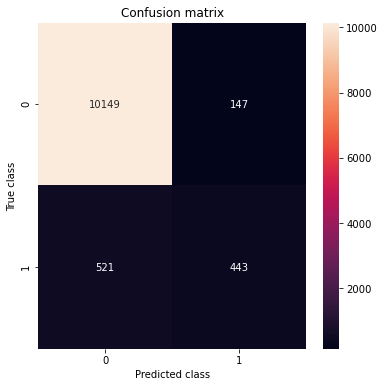

In [9]:
plot_confidence_matrix(eval["cm"], 6, 6, 'd')

## Tag 0: Weighted evaluation

In [10]:
print("Accuracy:", eval["weighted_accuracy"])

Accuracy: 0.9797633941209212


In [11]:
pd.DataFrame(eval["weighted_class_report"])

,0,1,macro avg,weighted avg
precision,0.989549,0.481789,0.735669,0.979630
recall,0.989814,0.475311,0.732563,0.979763
f1-score,0.989681,0.478528,0.734105,0.979696
support,68.831047,1.371381,70.202428,70.202428


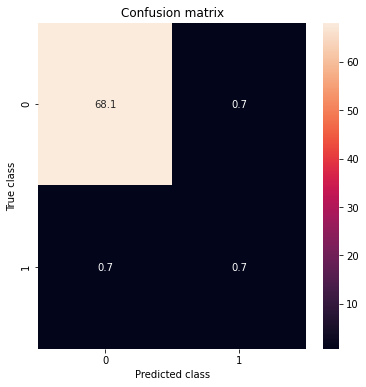

In [12]:
plot_confidence_matrix(eval["weighted_cm"], 6, 6, '.1f')

# Tag 1

In [16]:
df = read_dataset(source_path, signal, bg, "SR", 1)
sets = split_dataset(df, 0.6, 0.2, 0.2, seed)
sets["x"]["train"].head()

,m_FJpt,m_FJeta,m_FJphi,m_FJm,m_DTpt,m_DTeta,m_DTphi,m_DTm,m_dPhiFTwDT,m_dRFJwDT,m_dPhiDTwMET,m_MET,m_hhm,m_bbttpt
0,0.867840,0.356640,1.167905,-0.061652,0.507345,1.003025,-0.588037,0.141753,0.404200,-0.315846,-0.455940,0.289710,0.316159,0.270937
1,0.302375,-0.639431,1.639374,-0.089650,-1.080488,-0.101024,-0.264255,-0.976572,-1.014440,-1.255061,0.639547,1.626460,-1.087231,1.177989
2,0.506220,1.261525,-0.432246,-0.958477,1.455772,-0.613891,1.287555,-0.126837,0.476696,0.844689,-2.000573,-1.157203,2.008548,-0.887692
3,-1.727064,-2.018008,-0.572949,0.794526,-1.220742,0.603366,1.310630,-0.860938,-0.526392,1.549001,0.755960,-1.235323,-0.512929,-0.826652
4,-0.495464,1.349038,-1.528917,1.007694,-0.134578,-0.209359,-0.028194,0.001925,-1.935452,-0.977784,-0.757976,-0.977451,-0.171603,0.240656


In [17]:
bc1_tag1 = BC1(sets["x"]["test"].shape[1])
bc1_tag1.load("../../saved_models", "tag1_jun_2020")

In [18]:
eval = bc1_tag1.complete_evaluation(sets["x"]["test"], sets["y"]["test"], sets["w"]["test"], 0.4,
                                    save = True, name = "tag1_jun_2020")

## Tag 1: Non-weighted evaluation

In [19]:
print("Accuracy:", eval["accuracy"])

Accuracy: 0.877252952144189


In [20]:
pd.DataFrame(eval["class_report"])

,0,1,macro avg,weighted avg
precision,0.745704,0.926226,0.835965,0.880002
recall,0.790049,0.907268,0.848658,0.877253
f1-score,0.767236,0.916649,0.841943,0.878390
support,824.000000,2394.000000,3218.000000,3218.000000


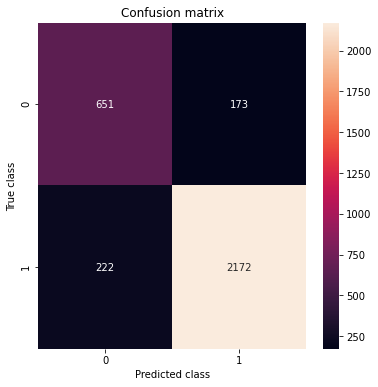

In [21]:
plot_confidence_matrix(eval["cm"], 6, 6, 'd')

## Tag 1: Weighted evaluation 

In [23]:
print("Accuracy:", eval["weighted_accuracy"])

Accuracy: 0.8389644955517003


In [24]:
pd.DataFrame(eval["weighted_class_report"])

,0,1,macro avg,weighted avg
precision,0.950834,0.679385,0.815109,0.866986
recall,0.808812,0.906428,0.857620,0.838964
f1-score,0.874092,0.776653,0.825372,0.843994
support,6.784337,3.032268,9.816606,9.816606


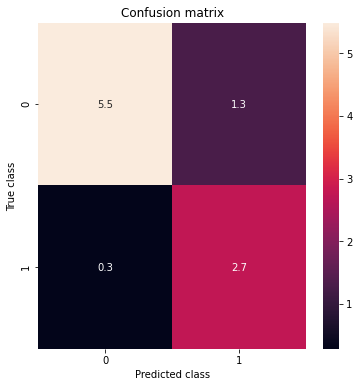

In [25]:
plot_confidence_matrix(eval["weighted_cm"], 6, 6, '.1f')

# Tag 2

In [26]:
df = read_dataset(source_path, signal, bg, "SR", 2)
sets = split_dataset(df, 0.6, 0.2, 0.2, seed)
sets["x"]["train"].head()

,m_FJpt,m_FJeta,m_FJphi,m_FJm,m_DTpt,m_DTeta,m_DTphi,m_DTm,m_dPhiFTwDT,m_dRFJwDT,m_dPhiDTwMET,m_MET,m_hhm,m_bbttpt
0,0.130367,0.444366,-0.742402,-1.667881,-0.481700,-0.821738,0.986630,-0.707962,0.286199,-0.060604,-0.308809,1.122165,-0.536045,0.343074
1,-0.154324,-0.757036,-1.493544,-0.589215,0.568245,-0.957618,0.263328,-0.190632,0.639077,-0.390635,-0.565153,-0.441870,-0.438832,-0.838744
2,0.909062,-0.559545,-1.666243,1.438288,0.033011,0.764030,0.097340,-0.283146,0.723747,0.299002,0.002110,0.820174,0.623691,0.595543
3,0.198608,-0.114302,1.325361,0.481073,0.195452,-1.168931,-0.468388,-0.280492,-0.281793,-0.609963,0.190788,1.189810,-0.078685,-0.048231
4,0.395712,-0.212834,-1.236288,-0.036609,-0.663686,0.235153,0.669041,-0.908677,-0.627592,-1.114341,0.051936,1.887263,-1.088247,0.856897


In [27]:
bc1_tag2 = BC1(sets["x"]["test"].shape[1])
bc1_tag2.load("../../saved_models", "tag2_jun_2020")

In [28]:
eval = bc1_tag2.complete_evaluation(sets["x"]["test"], sets["y"]["test"], sets["w"]["test"], 0.4,
                                    save = True, name = "tag2_jun_2020")

## Tag 2: Non-weighted evaluation

In [30]:
print("Accuracy:", eval["accuracy"])

Accuracy: 0.9733257661748014


In [31]:
pd.DataFrame(eval["class_report"])

,0,1,macro avg,weighted avg
precision,0.491228,0.989443,0.740335,0.976436
recall,0.608696,0.983100,0.795898,0.973326
f1-score,0.543689,0.986261,0.764975,0.974707
support,46.000000,1716.000000,1762.000000,1762.000000


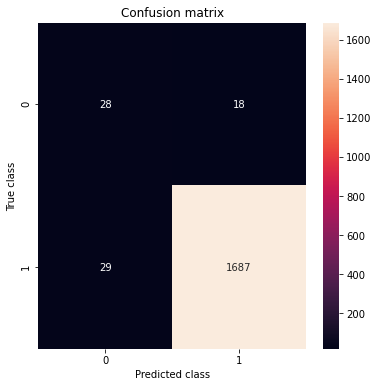

In [32]:
plot_confidence_matrix(eval["cm"], 6, 6, 'd')

## Tag 2: Weighted evaluation

In [33]:
print("Accuracy:", eval["weighted_accuracy"])

Accuracy: 0.9607853466660048


In [34]:
pd.DataFrame(eval["weighted_class_report"])

,0,1,macro avg,weighted avg
precision,0.922109,0.967768,0.944939,0.960083
recall,0.837804,0.985676,0.911740,0.960785
f1-score,0.877937,0.976640,0.927289,0.960026
support,0.392325,1.938392,2.330717,2.330717


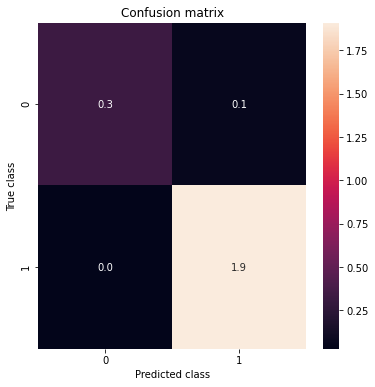

In [35]:
plot_confidence_matrix(eval["weighted_cm"], 6, 6, '.1f')